# Categorical explanatory variables


In [7]:
# Import seaborn with alias sns
import seaborn as sns
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
#import pandas 
import pandas as pd
# import statsmodels
from statsmodels.formula.api import ols

In [8]:

# Importing the course arrays
conversion = pd.read_csv("../datasets/ad_conversion.csv")
churn = pd.read_csv("../datasets/churn.csv")
fish = pd.read_csv("../datasets/fish.csv")
sp500 = pd.read_csv("../datasets/sp500_yearly_returns.csv")
taiwan = pd.read_csv("../datasets/taiwan_real_estate2.csv")
taiwan_real_estate= taiwan

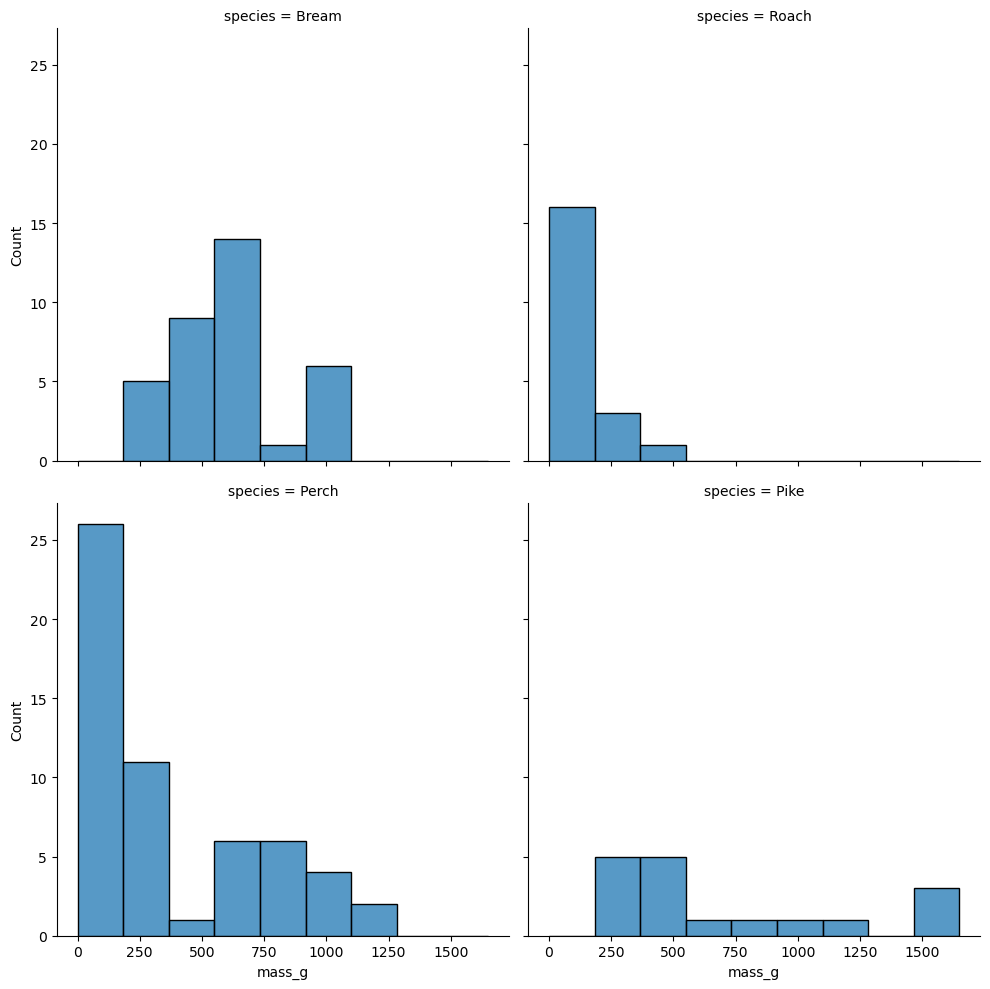

In [10]:

sns.displot(data=fish,x="mass_g",
            col="species",
            col_wrap=2,
            bins=9)

plt.show()

In [11]:
summary_stats = fish.groupby("species")["mass_g"].mean()
print(summary_stats)

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [12]:
from statsmodels.formula.api import ols
mdl_mass_vs_species = ols("mass_g ~ species", data=fish).fit()
print(mdl_mass_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


## Visualizing numeric vs. categorical


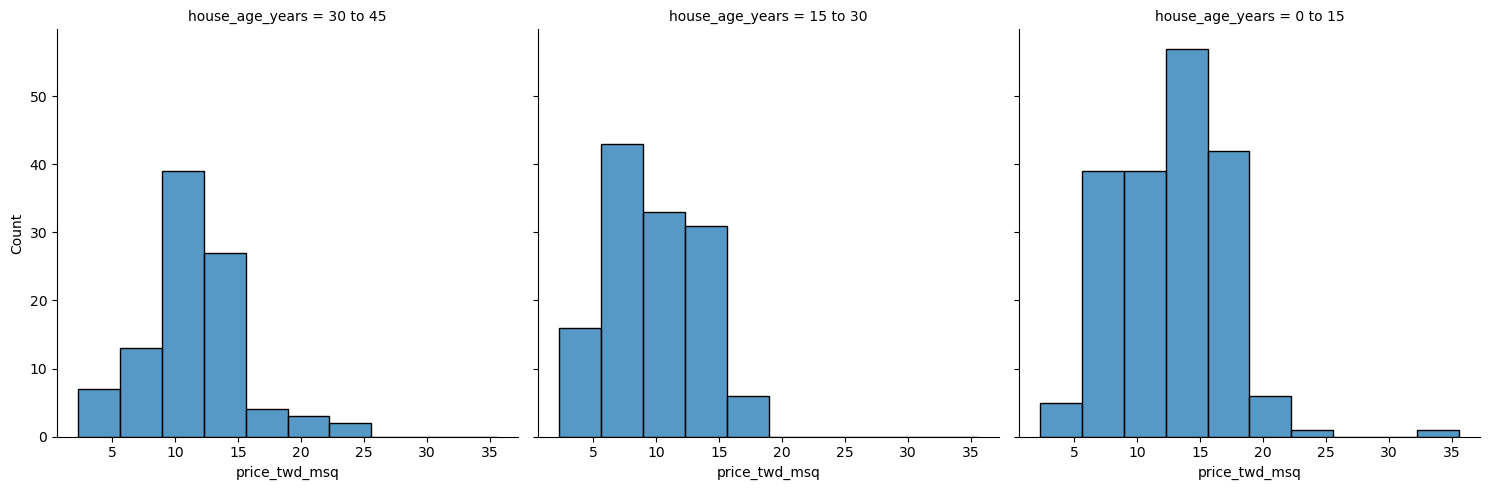

In [13]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
            x="price_twd_msq",
            col="house_age_years",
            bins=10)

# Show the plot
plt.show()

## Calculating means by category


In [14]:

# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

# Print the result
print(mean_price_by_age)


house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


## Linear regression with a categorical explanatory variable


In [15]:
# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [16]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64
